In [21]:
from tyssue import Sheet

from tyssue import PlanarGeometry as geom

from tyssue.draw import sheet_view

In [22]:
# area = the absolute value of Ax(By - Cy) + Bx(Cy - Ay) + Cx(Ay - By) divided by 2

#TriangleArea = abs( (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2 )

In [23]:
#2D cell map

cellmap = Sheet.planar_sheet_2d('2D', nx=5, ny=7, distx=1, disty=1)

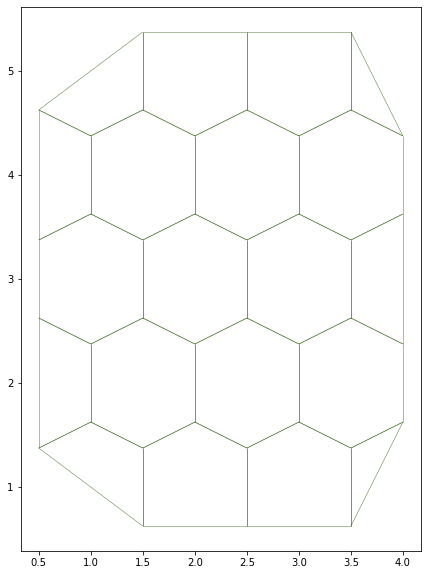

In [31]:
#visualisation

fig, axis = sheet_view(cellmap)

fig.set_size_inches(10, 10)

cellmap.sanitize ( trim_borders=True, order_edges=True )

geom.update_all(cellmap)

In [25]:
def triangle_area(x1,y1,x2,y2,x3,y3):
    area = abs( (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2 )
    return area

In [26]:
face_groups_df = cellmap.edge_df.groupby(['face'])
face_groups_df.groups

{0: [0, 1, 2, 3], 1: [4, 5, 6, 7, 8], 2: [9, 10, 11, 12, 13], 3: [14, 15, 16], 4: [17, 18, 19, 20], 5: [21, 22, 23, 24, 25, 26], 6: [27, 28, 29, 30, 31, 32], 7: [33, 34, 35, 36, 37, 38], 8: [39, 40, 41, 42, 43, 44], 9: [45, 46, 47, 48, 49, 50], 10: [51, 52, 53, 54, 55, 56], 11: [57, 58, 59, 60], 12: [61, 62, 63, 64], 13: [65, 66, 67, 68, 69, 70], 14: [71, 72, 73, 74, 75, 76], 15: [77, 78, 79, 80, 81, 82], 16: [83, 84, 85, 86], 17: [87, 88, 89, 90, 91], 18: [92, 93, 94, 95, 96], 19: [97, 98, 99]}

In [27]:
for face in range(len(face_groups_df)):
    allTrianglesArea = 0
    edgesPerFace = face_groups_df.indices[face];
    print([face])
    firstEdge = cellmap.edge_df.loc[edgesPerFace[0]];
    for numEdge in range(len(edgesPerFace)-1):
        currentEdge = cellmap.edge_df.loc[edgesPerFace[numEdge]];
        nextEdge = cellmap.edge_df.loc[edgesPerFace[numEdge + 1]];
        allTrianglesArea = allTrianglesArea + triangle_area(firstEdge.sx, firstEdge.sy, currentEdge.tx, currentEdge.ty, nextEdge.tx, nextEdge.ty)
        print(allTrianglesArea)

[0]
0.1875
0.5
0.5
[1]
0.375
0.6875
0.875
0.875
[2]
0.375
0.6875
0.875
0.875
[3]
0.1875
0.1875
[4]
0.1875
0.5
0.5
[5]
0.125
0.5
0.8125
1.0
1.0
[6]
0.125
0.5
0.8125
1.0
1.0
[7]
0.125
0.5
0.8125
1.0
1.0
[8]
0.125
0.5
0.8125
1.0
1.0
[9]
0.125
0.5
0.8125
1.0
1.0
[10]
0.125
0.5
0.8125
1.0
1.0
[11]
0.3125
0.5
0.5
[12]
0.1875
0.5
0.5
[13]
0.125
0.5
0.8125
1.0
1.0
[14]
0.125
0.5
0.8125
1.0
1.0
[15]
0.125
0.5
0.8125
1.0
1.0
[16]
0.125
0.5
0.5
[17]
0.125
0.5
0.875
0.875
[18]
0.125
0.5
0.875
0.875
[19]
0.1875
0.1875


In [28]:
print(cellmap.face_df)

             y  is_alive  perimeter    area         x  num_sides  id
face                                                                
0     1.250000         1   3.118034  0.5000  1.125000          4   0
1     1.125000         1   3.618034  0.8750  2.000000          5   0
2     1.125000         1   3.618034  0.8750  3.000000          5   0
3     1.208333         1   2.427051  0.1875  3.666667          3   0
4     2.000000         1   3.118034  0.5000  0.750000          4   0
5     2.000000         1   3.736068  1.0000  1.500000          6   0
6     2.000000         1   3.736068  1.0000  2.500000          6   0
7     2.000000         1   3.736068  1.0000  3.500000          6   0
8     3.000000         1   3.736068  1.0000  1.000000          6   0
9     3.000000         1   3.736068  1.0000  2.000000          6   0
10    3.000000         1   3.736068  1.0000  3.000000          6   0
11    3.000000         1   3.118034  0.5000  3.750000          4   0
12    4.000000         1   3.11803

In [29]:
for face in range(len(face_groups_df)):
    edgesPerFace = face_groups_df.indices[face];
    for numEdge in range(len(edgesPerFace)-1):
        currentEdge = cellmap.edge_df.loc[edgesPerFace[numEdge]];
        nextEdge = cellmap.edge_df.loc[edgesPerFace[numEdge + 1]];
        currentEdge = cellmap.edge_df.loc[edgesPerFace[numEdge]]
        nextEdge = cellmap.edge_df.loc[edgesPerFace[numEdge + 1]];
        if nextEdge.sx != currentEdge.tx or nextEdge.sy != currentEdge.ty:
            print(face, 'False')
        else:
            print(face, 'Correct')

0 Correct
0 Correct
0 Correct
1 Correct
1 Correct
1 Correct
1 Correct
2 Correct
2 Correct
2 Correct
2 Correct
3 Correct
3 Correct
4 Correct
4 Correct
4 Correct
5 Correct
5 Correct
5 Correct
5 Correct
5 Correct
6 Correct
6 Correct
6 Correct
6 Correct
6 Correct
7 Correct
7 Correct
7 Correct
7 Correct
7 Correct
8 Correct
8 Correct
8 Correct
8 Correct
8 Correct
9 Correct
9 Correct
9 Correct
9 Correct
9 Correct
10 Correct
10 Correct
10 Correct
10 Correct
10 Correct
11 Correct
11 Correct
11 Correct
12 Correct
12 Correct
12 Correct
13 Correct
13 Correct
13 Correct
13 Correct
13 Correct
14 Correct
14 Correct
14 Correct
14 Correct
14 Correct
15 Correct
15 Correct
15 Correct
15 Correct
15 Correct
16 Correct
16 Correct
16 Correct
17 Correct
17 Correct
17 Correct
17 Correct
18 Correct
18 Correct
18 Correct
18 Correct
19 Correct
19 Correct
